<a href="https://colab.research.google.com/github/psbruno/Redes-Neurais/blob/main/SOM_Bruno_Pires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Projeto 3 - Rede SOM </h1>
<h3> Bruno Pires </h3>

<p> 
  A rede SOM (Self Organized Map) é uma RNA de aprendizado não supervisionado competitvo, extremamente interessante para datasets com grande números de atributos, pois conseguimos analisar a saída visualmente, normalmente com uma representação discreta da entrada no plano. 
  
Baseado no mapa topológico do córtex cerebral, onde os neurônios próximos  nessas regiões tendem a responder a estímulos ou padrões semelhantes, nesse modelo implementado, é criado uma camada de duas dimensões onde existem ligações entre alguns neurônios, como uma vizinhança, além de uma ligação de todas as entradas em todos os neurônios, como representa a imagem a seguir:

<p align = "center">
<img src ="https://res.cloudinary.com/practicaldev/image/fetch/s--D6wkWY5o--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://miro.medium.com/max/420/0%2Atqifhm1yjWLetoTG.gif"/>

</p>
<a align = "center" href = "https://dev.to/giselyalves13/descobrindo-som-uma-rede-neural-com-aprendizado-nao-supervisionado-1l8c">
Fonte: artigo sobre a rede SOM 
</a>
</p>

A ativação de um neurônio é feita de acordo com uma função discriminante, a qual é a base da competição, pois o neurônio com melhor resultado nela é o neurônio vencedor. Assim, a localização do neurônio vencedor e seus vizinhos são reajustados, da mesma forma que alguns de seus parâmetros, de acordo com o padrão de entrada.


<br><br>

----


<br><br>
<h3>Com isso em mente, podemos partir para a implementação dessa rede.<h3>
<p> 
Biblioteca utilizada: 
<a href = "https://github.com/JustGlowing/minisom"> MiniSom 
</a>
</p>

In [1]:
import pandas as pd
import numpy as np
!pip install minisom
from minisom import MiniSom
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=eaac5ac10d087641eeffc14b364edf75036461872d3a97bd6a7f9139e4a6bd0c
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


#Datasets utilizados


1.   Dataset com diversos dados de doadores de sangues e portadores de hepatite C, Fonte: [Kaggle](https://www.kaggle.com/fedesoriano/hepatitis-c-dataset)
2.   Dataset com dados do campeonato europeu de League of Legends do ano de 2019. Fonte: [Kaggle](https://www.kaggle.com/stephenofarrell/league-of-legends-european-championship-2019)


Arquivos utilizados também disponíveis no [Google Drive](https://drive.google.com/drive/folders/1uSyqzS6yJxVrmi6UrkFSf3hw_x7fTgRv?usp=sharing).

Note que no bloco de código seguinte, onde há a leitura e um pequeno tratamento dos dados, temos a divisão dos atributos utilizados, que poderá nos proporcionar alguns resultados interessantes.

In [3]:
columns = ['ALB', 'ALP', 'ALT', 'AST','BIL', 'PROT']
columns_2 = ['ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
hepatite = pd.read_csv("/content/HepatitisCdata.csv")
hepatite = hepatite.dropna().reset_index().drop(columns='index')

hep_values = []
hep_labels = []
hep_values_2 = []
hep_targets = pd.factorize(hepatite['Category'])[0]
hep_targets_names = np.unique(hepatite['Category'])
for i in range(490,589):
  hep_values.append(list(hepatite[columns].iloc[i]))
  hep_values_2.append(list(hepatite[columns_2].iloc[i]))
  hep_labels.append(hep_targets[i])

In [48]:
players = pd.read_csv("/content/lec_playerdata.csv")
players_values = players[['GP', 'W%', 'K', 'D', 'A', 'KDA',
       'KP', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 'CSPM', 'CS%P15', 'DPM',
       'DMG%', 'EGPM', 'Gold%', 'WPM', 'WCPM']].values
players_targets = players['Pos'].factorize()[0]
players_labels = np.unique(players_labels)

#Funções de plot

Fonte: [MiniSom](https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb)

In [5]:
def distance_map(som,values,labels):
  plt.figure(figsize=(9, 9))

  plt.pcolor(som.distance_map().T, cmap='bone_r') 
  plt.colorbar()
  colors= ['C0','C1', 'C2','C3','C4']
  markers = ['.', 'o', 'p','P','X','d']
  for cnt, xx in enumerate(values):
      w = som.winner(xx)
      plt.plot(w[0]+.5, w[1]+.5, 
              markers[labels[cnt]-1], 
              markerfacecolor='None',
              markeredgecolor=colors[labels[cnt]-1], markersize=12, markeredgewidth=2)
  plt.title("Mapa de distância")
  plt.show()

In [6]:
def winning_neurons(som,values,labels,targets_names):
  w_x, w_y = zip(*[som.winner(d) for d in values])
  w_x = np.array(w_x)
  w_y = np.array(w_y)
  colors= ['C0','C1', 'C2','C3','C4']

  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()

  for c in np.unique(labels):
      idx_target = labels==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, 
                  c=colors[c-1], 
                  label=targets_names[c])
  plt.title("Neurônios vencedores")
  plt.legend(loc='upper right')
  plt.grid()
  plt.show()

In [7]:
def activation_frequencies(som,values):
  plt.figure(figsize=(7, 7))
  frequencies = som.activation_response(values)
  plt.pcolor(frequencies.T, cmap='Blues') 
  plt.title("Frequências de ativação")
  plt.colorbar()
  plt.show()

In [21]:
def class_per_neuron(som,values, targets_names, labels):
  labels_map = som.labels_map(values, [targets_names[t] for t in labels])
  fig = plt.figure(figsize=(9, 9))
  the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][l] for l in targets_names]
      plt.subplot(the_grid[n_neurons-1-position[1],
                          position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)
  plt.legend(patches, targets_names, bbox_to_anchor=(3.5, 6.5), ncol=3)
  plt.show()


In [17]:
def training_evolution(som, values):
  max_iter = 1000
  q_error = []
  t_error = []

  for i in range(max_iter):
      rand_i = np.random.randint(len(values))
      som.update(values[rand_i], som.winner(values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(values))
      t_error.append(som.topographic_error(values))

  plt.plot(np.arange(max_iter), q_error, label='Erro de quantização')
  plt.plot(np.arange(max_iter), t_error, label='Erro topográfico')
  plt.title("Evolução no treinamento")
  plt.ylabel('Erro')
  plt.xlabel('Iteração')
  plt.legend()
  plt.show()


#Primeiro Dataset 

Como este dataset contém valores das taxas de substâncias presentes no sangue humano, a intenção será clusterizar doadores de sangue, potenciais doadores de sangue e portadores de doenças ou condições, sendo elas Hepatite,  Cirrose e Fibrose

##Simulação 1

Rede 10x10 com 6 atributos e 10000 gerações no treinamento. 

In [14]:
som_hep = MiniSom(10, 10, 6, sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)
som_hep.pca_weights_init(hep_values)
som_hep.train(hep_values, 10000, verbose=False)

Nesse primeiro gráfico podemos ver o resultado do treinamento, onde cada símbolo colorido representa uma das classes e a cor de fundo, os tons de preto, a distância dos neurônios vizinhos.

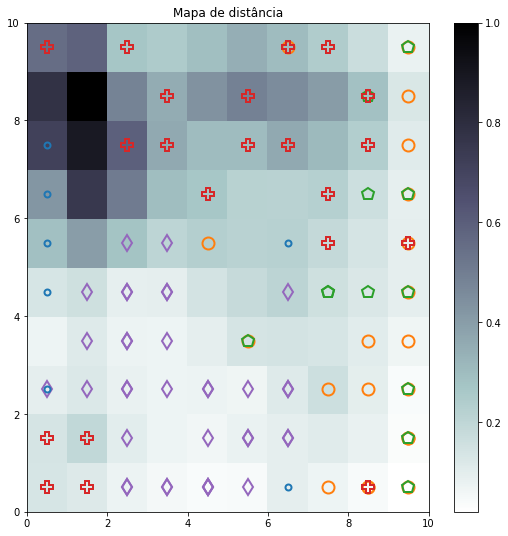

In [15]:
distance_map(som_hep,hep_values,hep_labels)

Mapa com a frequênncia de ativação dos neurônios da rede, ou seja, as cores mais escuras nos mostram os neurônios de nossa rede que foram ativados mais vezes ao longo das gerações.

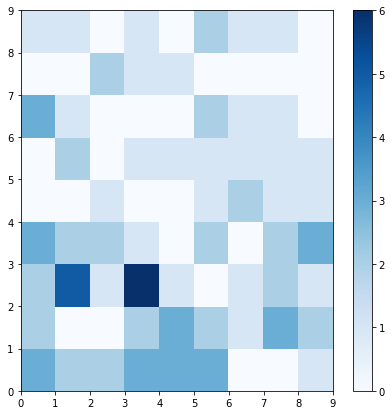

In [ ]:
activation_frequencies(som_hep,hep_values)

Podemos ver os neurônios vencedores para entender melhor como as classes são distribuídas, assim como as classes pertencentes.

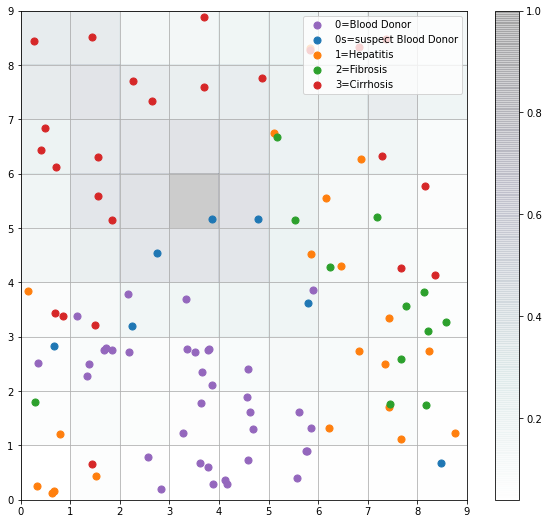

In [ ]:
winning_neurons(som_hep,hep_values,hep_labels,hep_targets_names)

Proporção das classes em cada um dos neurônios ao longo das gerações

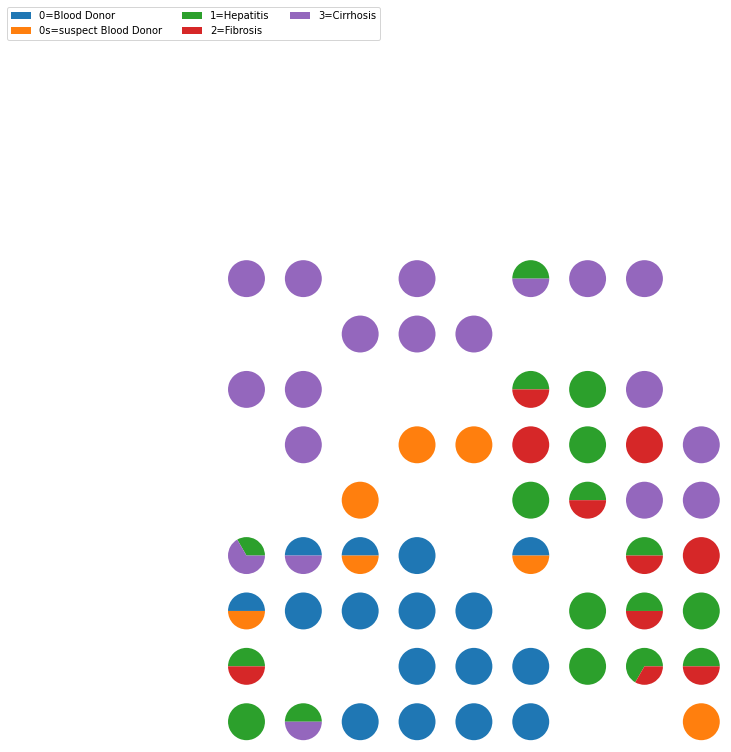

In [ ]:
class_per_neuron(som_hep,hep_values, hep_targets_names,hep_labels)

Evolução do treinamento, por meio do erro de quantização, para podermos entender o quão concisos são os clusters, ou seja, para ver se a distribuição e delimitação das características das classes foram feitas de forma suficeinte, e o erro topográfico, que é uma forma de entender a similaridade da vizinhança, conforme visto em aula

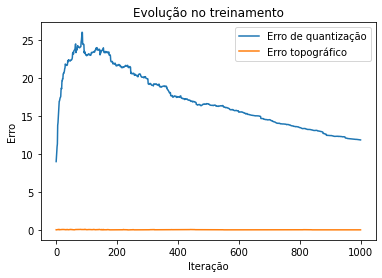

In [18]:
training_evolution(som_hep, hep_values)

Como vimos, nossos clusters não foram muito bem definidos nessa simulação, sendo bem evidente até mesmo pelo plot do erro de quantização.
Na próxima simulação iremos tentar modificar a rede, aumentando o número de neurônios para que os clusters possam ser mais delimitados, algo que parece ser alcançável uma vez que o erro topográfico nos diz que a qualidade da vizinhaça está interessante.
Além disso, alguns  parâmetros serão modificados para essa mesma finalidade (principalmente o número de iterações no treinamento)

##Simulação 2

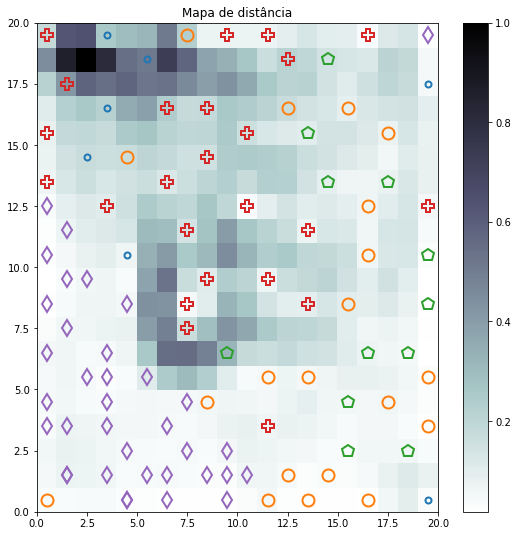

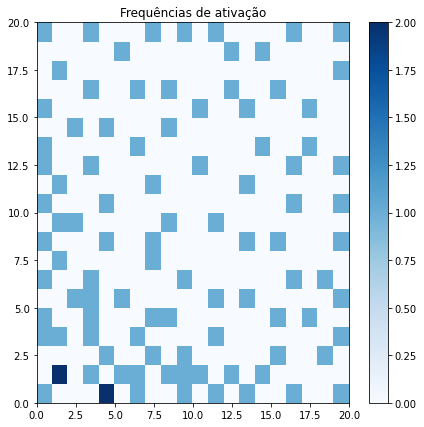

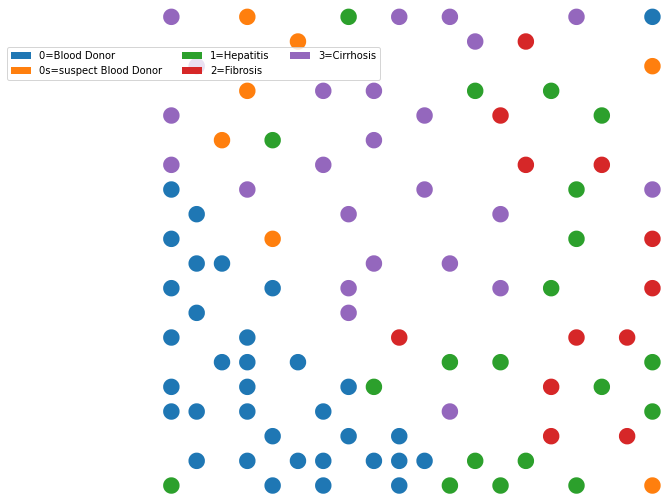

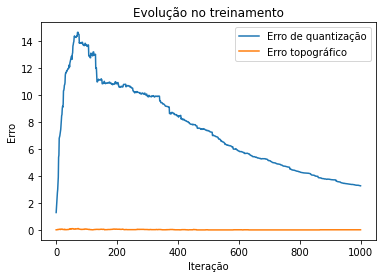

In [24]:
n_neurons = 20
m_neurons = 20
som_hep = MiniSom(n_neurons, m_neurons, 6, sigma=1.75, learning_rate=.75, 
              neighborhood_function='gaussian', random_seed=0)
som_hep.pca_weights_init(hep_values)
som_hep.train(hep_values, 20000, verbose=False)
distance_map(som_hep,hep_values,hep_labels)
activation_frequencies(som_hep,hep_values)
class_per_neuron(som_hep,hep_values, hep_targets_names,hep_labels)
training_evolution(som_hep, hep_values)

Note que agora os nossos clusters estão mais definidos, com um número maior de neurônios e gerações, mas ainda não seria exatamente o suficiente. Além disso, os gráficos de erros ao longo das iterações nos mostra que estamos em um caminho interessante

Assim, podemos aumentar o número de atributos para ver se isso é suficiente para definir melhor os clusters.

##Simulação 3

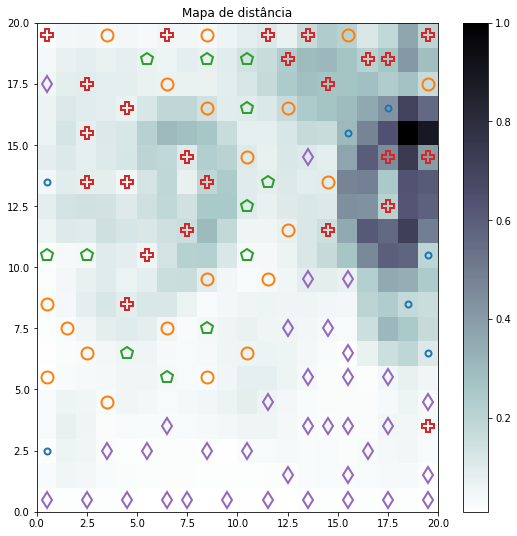

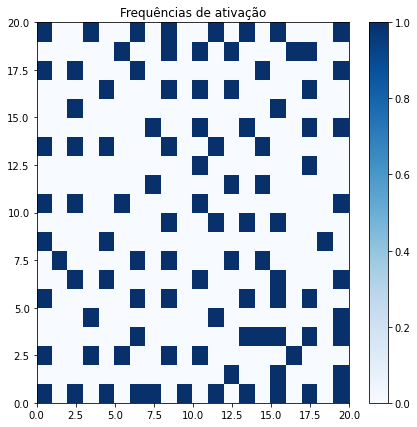

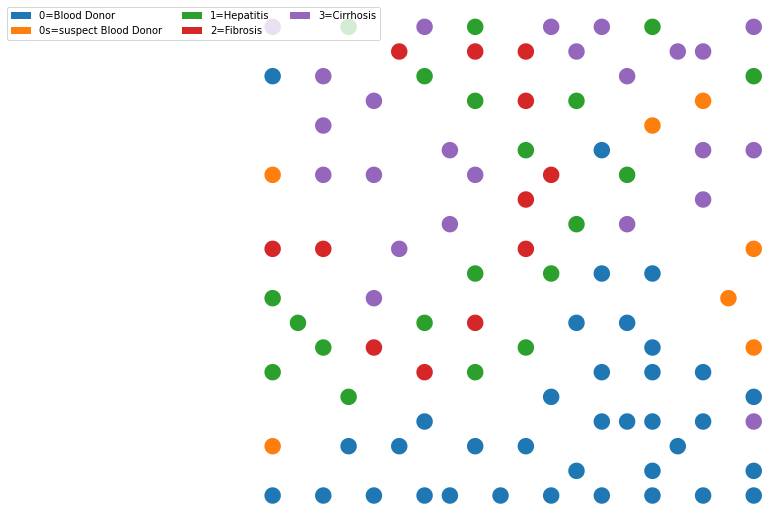

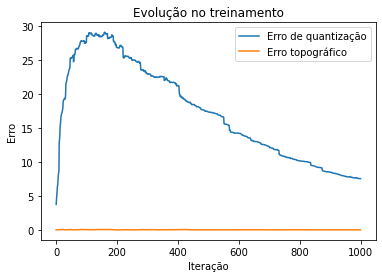

In [28]:
n_neurons = 20
m_neurons = 20
som_hep_2 = MiniSom(n_neurons, m_neurons, 10, sigma=1.75, learning_rate=.75, 
              neighborhood_function='gaussian', random_seed=0)
som_hep_2.pca_weights_init(hep_values_2)
som_hep_2.train(hep_values_2, 20000, verbose=False)
distance_map(som_hep_2,hep_values_2,hep_labels)
activation_frequencies(som_hep_2,hep_values_2)
class_per_neuron(som_hep_2,hep_values_2, hep_targets_names,hep_labels)
training_evolution(som_hep_2, hep_values_2)

Já agora, mesmo com o erro de quantização progradindo e os clusters relativamente mais separados, tenho a impressão de que como a frequência de ativação dos mesmos neurônios se mostrou muito alta, a chance de overfitting é grande. Logo, considero que mesmo com novos parâmetros, os resultados obtidos na simulação 2 são mais interessantes.

#Segundo dataset

League of Legends é um jogo entre 10 jogadores dispostos em dois times de 5, onde são necessárias estratégias para destruir torres inimigas e defender aliadas, até a principal estrutura, o nexus.

Assim, cada jogador tem sua posição específica fixa dentro de um time para a execução dessas estratégias, algo parecido com as posições do futebol, como atacante, meio campo, volante e etc. Porém, são apenas 5 possições possíveis no league of legends: Top, Jungle, Mid, ADCarry (ou ADC) e suporte. 

Assim, o conjunto de dados em questão possui estatísticas de 220 jogadores da liga europeia de league of legends, e tentaremos tentando clusterizar os jogadores de acordo com a sua posição dentro do jogo.

##Simulação 4

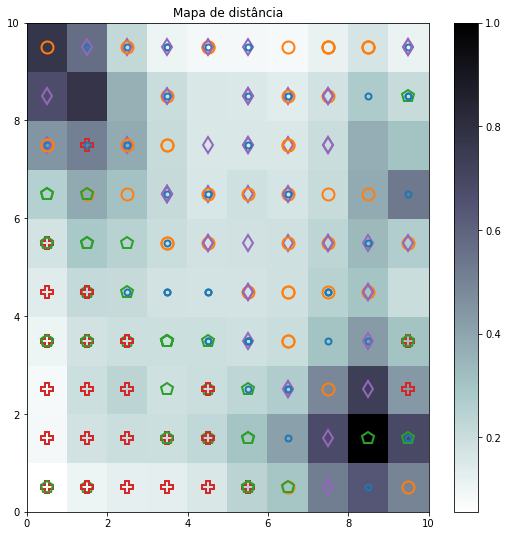

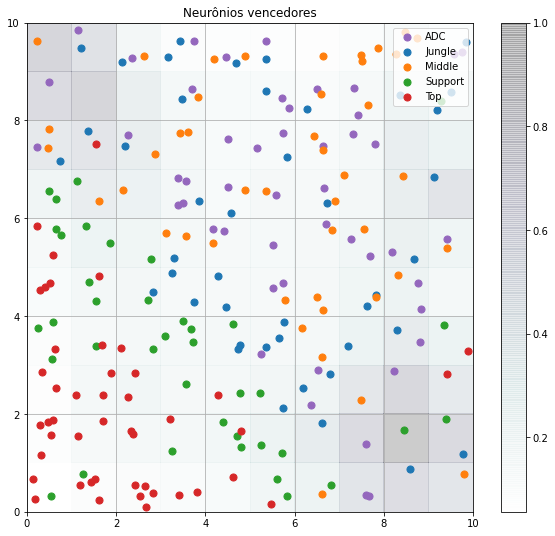

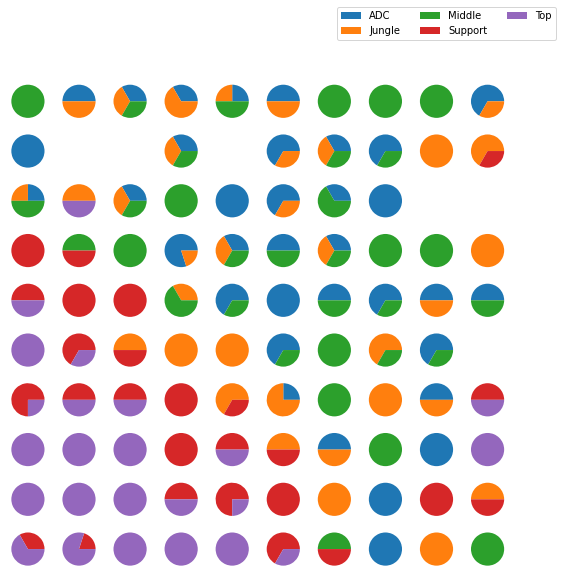

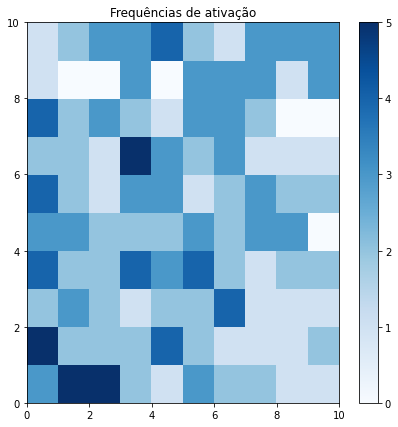

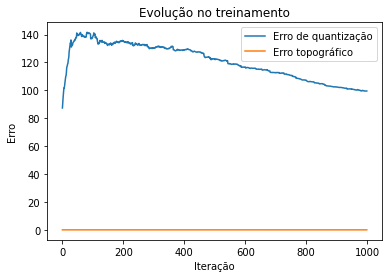

In [49]:
n_neurons = 10
m_neurons = 10
som_lol = MiniSom(n_neurons, m_neurons, 20, sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)
som_lol.pca_weights_init(players_values)
som_lol.train(players_values, 20000, verbose=False)
distance_map(som_lol,players_values,players_targets)
winning_neurons(som_lol,
                players_values,
                players_targets,
                players_labels)
class_per_neuron(som_lol,
                 players_values,
                 np.unique(players_labels),
                 players_targets
                 )
activation_frequencies(som_lol,players_values)
training_evolution(som_lol, players_values)

Podemos ver que aparentemente o número de neuronios se mostrou insuficiente, pois houve a tendência para a criação de clusters, mas não a sua definição de forma mais exata. Iremos adaptar isso e o número de gerações na próxima simulação.

##Simulação 5

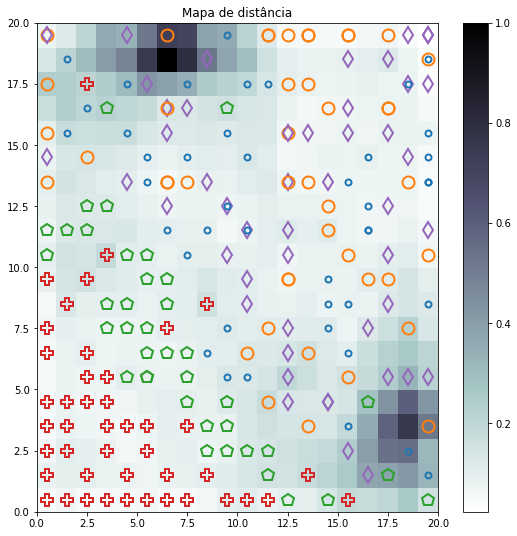

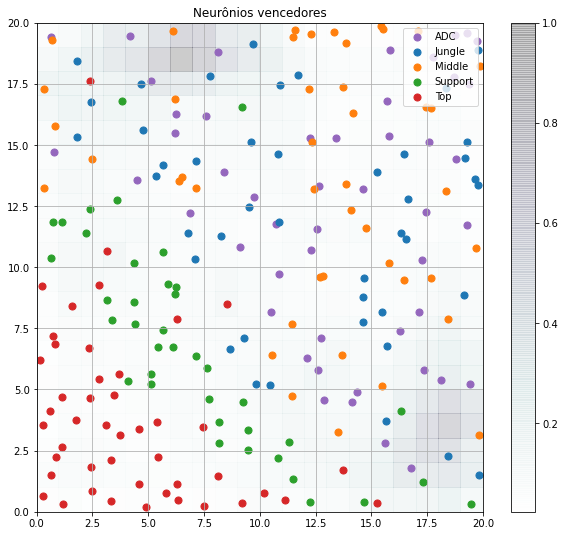

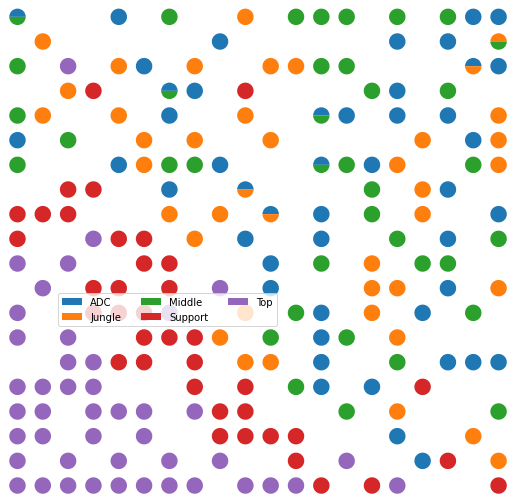

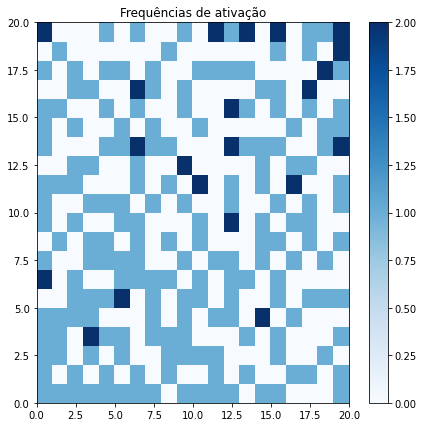

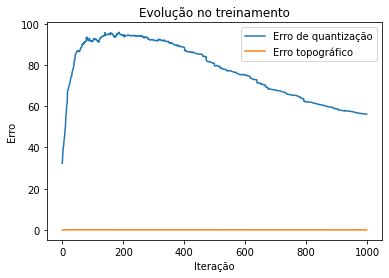

In [50]:
n_neurons = 20
m_neurons = 20
som_lol_2 = MiniSom(n_neurons, m_neurons, 20, sigma=1.75, learning_rate=.75, 
              neighborhood_function='gaussian', random_seed=0)
som_lol_2.pca_weights_init(players_values)
som_lol_2.train(players_values, 30000, verbose=False)
distance_map(som_lol_2,players_values,players_targets)

winning_neurons(som_lol_2,
                players_values,
                players_targets,
                players_labels)

class_per_neuron(som_lol_2,
                 players_values,
                 np.unique(players_labels),
                 players_targets
                 )

activation_frequencies(som_lol_2,players_values)

training_evolution(som_lol_2, players_values)

Agora sim tivemos um resultado um pouco mais interessante, com a clara delimitação de algumas classes e um progresso no erro de quantização. 

Podemos ver dois clusters que se aproximam bastante, e o mais interessante é que as funções deles dentro do jogo podem ser relativamente parecidas, algo como meio campistas e volantes. 

Entretanto, três classes ainda não se definiram bem, pois são muito mais flexíveis a estrátégia tomada pelo time e características pessoais dos jogadores. Novamente, tentaremos separar elas adaptando os parametros de nossa rede

##simulaçao 6

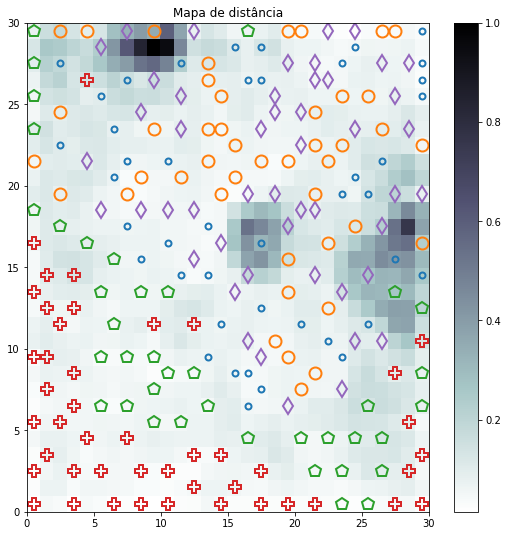

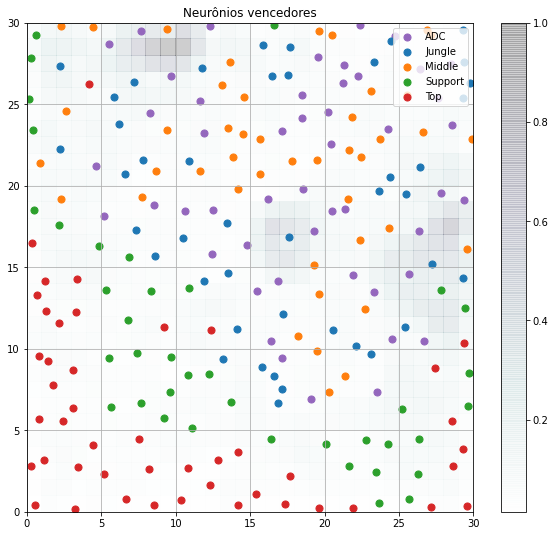

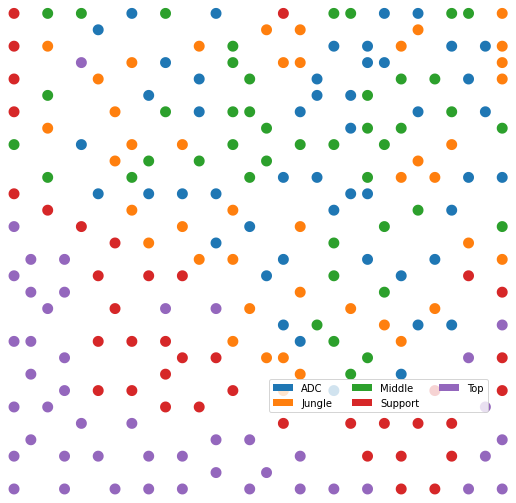

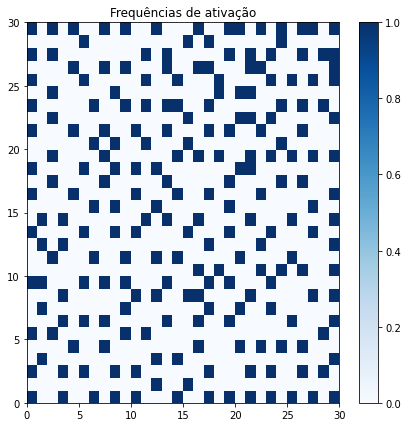

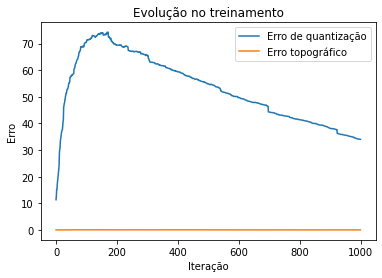

In [52]:
n_neurons = 30
m_neurons = 30
som_lol_3 = MiniSom(n_neurons, m_neurons, 20, sigma=1.95, learning_rate=.85, 
              neighborhood_function='gaussian', random_seed=0)
som_lol_3.pca_weights_init(players_values)
som_lol_3.train(players_values, 45000, verbose=False)
distance_map(som_lol_3,players_values,players_targets)

winning_neurons(som_lol_3,
                players_values,
                players_targets,
                players_labels)

class_per_neuron(som_lol_3,
                 players_values,
                 np.unique(players_labels),
                 players_targets
                 )

activation_frequencies(som_lol_3,players_values)

training_evolution(som_lol_3, players_values)

Note que o erro de quantização teve um comportamento interessante, mas nem tanto quanto o comportamento dos clusters ou a ativação dos neurônios. Mesmo com um caso parecido ao da simulação 3, que também me leva a crer em um possível overfitting, não tivemos a definição clara dos clusters, mas entre as mesmas classes que podem ser flexíveis. 

Entretanto, algo que me chamou a atenção é a formação de clusters menores entre pontos de diferentes classes, o que me leva a crer que eles possam ter características parecidas, relativas aos pontos citados na simulação 5 (como alguns zagueiros e centroavantes podem ser pesados, possuir bom cabeceio, não correr muito e acabarem sendo fisicamente fortes, da mesma forma que laterais e pontas são rápidos, leves e sabem executar cruzamentos. Classificando entre jogadores de ataque e defesa, a tendência é que eles se aproximem mais, mesmo pertencendo a classes diferentes).

Portanto, o que podemos concluir é que faria mais sentido especificar as classes de outras formas, em vez de procurar maneiras para tentar clusterizar dessa forma